# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [101]:
data=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data',  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['Elephants', 'Tiger', 'Cheetah','Crocodile'],
    batch_size = 4,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data  # Random seed for shuffling and transformations
    validation_split = 0 # Resize images without aspect ratio distortion
)

Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [102]:
data_iterator=data.as_numpy_iterator()

In [103]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

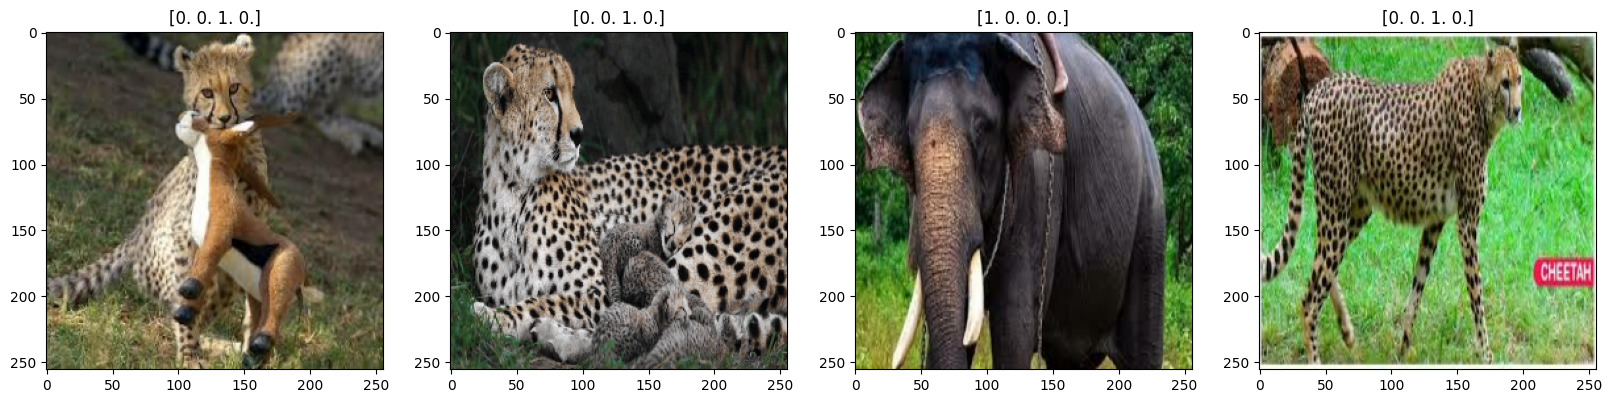

In [104]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [105]:
scaler=tf.keras.layers.Rescaling(1./255)
data= data.map(lambda x, y: (scaler(x), y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [106]:
train=data.take(370)
test=data.skip(370)
print(len(data))

415


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = 42),


        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = 42),

        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = 42)
    ]
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3),padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.3),
    Conv2D(512, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2),padding='same'),
    Dropout(0.5),,
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

SyntaxError: invalid syntax (<ipython-input-107-0fdfd73d8a69>, line 43)

**Q.6** Compile your model

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [110]:
model.fit(train, epochs=25,batch_size=4)

Epoch 1/15
370/370 [==============================] - 23s 61ms/step - loss: 0.7633 - accuracy: 0.8230
Epoch 2/15
370/370 [==============================] - 24s 65ms/step - loss: 0.7571 - accuracy: 0.8257
Epoch 3/15
370/370 [==============================] - 24s 63ms/step - loss: 0.7159 - accuracy: 0.8324
Epoch 4/15
370/370 [==============================] - 23s 63ms/step - loss: 0.5838 - accuracy: 0.8459
Epoch 5/15
370/370 [==============================] - 24s 63ms/step - loss: 0.6873 - accuracy: 0.8635
Epoch 6/15
370/370 [==============================] - 24s 63ms/step - loss: 0.6395 - accuracy: 0.8676
Epoch 7/15
370/370 [==============================] - 23s 62ms/step - loss: 0.6282 - accuracy: 0.8615
Epoch 8/15
370/370 [==============================] - 24s 65ms/step - loss: 0.5159 - accuracy: 0.8804
Epoch 9/15
370/370 [==============================] - 23s 63ms/step - loss: 0.5106 - accuracy: 0.9027
Epoch 10/15
370/370 [==============================] - 24s 63ms/step - loss: 0.526

**Q.8** Test your code with test set

In [111]:
loss,accuracy=model.evaluate(test)

45/45 [==============================] - 13s 32ms/step - loss: 1.0460 - accuracy: 0.8644


In [ ]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Try again, not enough accuracy! Your accuracy is 0.7155963182449341


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**